In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
#gerekli kütüphaneler

In [2]:
#CSV dosyasını okuyarak bir DataFrame oluşturuluyor.
df = pd.read_csv("bodyPerformance.csv")  
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [3]:
df.isnull().sum() #Eksik değer kontrolü

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [4]:
df.info()  #DataFrame bilgileri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()
class_encoder = LabelEncoder() 
#LabelEncoder nesnesi oluşturuluyor.
#numerik olmayan değerler için encoding yapılacak

In [6]:
df['gender'] = gender_encoder.fit_transform(df['gender']) # Female için 0 Male için 1 değeri 

# Burada sınıf birleştirme işlemi yapılmıştır daha iyi performans için B ve C sınıfı orta kategori olarak düşünülerek birleştirilmiştir
df['class_x'] = [0 if each == 'A' else 1 if each in ['B', 'C'] else 2 for each in df['class']]
# İşlem sonunda 4 farklı kategori 3 kategoriye indirgenmiştir bu işlem modelin performansını belirli ölçüde artırmıştır
df 

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_x
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,1
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,1
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,1
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,2
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0
13391,64.0,0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,2


In [7]:
X = df.drop(["class_x","class"],axis=1) 
y = df.class_x  #df.class yazımı "invalid syntax" hatası verdiği için class yerine class_x ifadesi kullanıldı


In [8]:
X  #girdiler

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0
...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0
13391,64.0,0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0


In [9]:
y #çıktılar

0        1
1        0
2        1
3        1
4        1
        ..
13388    1
13389    2
13390    0
13391    2
13392    1
Name: class_x, Length: 13393, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split #test ve eğitim verisini ayırabilmek için gerekli kütüphane

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size=0.8, random_state=42) #test ve eğitim verisi oluşturma
#aynı sonuçları üretmek için random_state parametresi eklendi


In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)  # veri setini kaç farklı şekilde ayıracağımızı belirledik
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [13]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)    #soldaki küme eğitim verisini içerir sağ taraf ise test verisini içerir

[2 3 4 5 6 7 8] [0 1]
[0 1 4 5 6 7 8] [2 3]
[0 1 2 3 6 7 8] [4 5]
[0 1 2 3 4 5 8] [6 7]
[0 1 2 3 4 5 6 7] [8]


In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
from sklearn.svm import SVC

# SVC modelini oluştur
svc_model1 = SVC(C=1, kernel='poly', degree=3)  #hiper parametre deneme yanılma ile seçildi
# SVC modelini eğitim verisi üzerinde eğit 
svc_model1.fit(X_train, y_train)         

# 5 kat çapraz doğrulama (cross-validation) ile doğruluk oranlarını hesapla
scores1 = cross_val_score(svc_model1, X, y, cv=5)


print("SVC Eğitim verisi doğruluk oranı:", svc_model1.score(X_train, y_train))
print("SVC KFold doğruluk oranı:", np.average(scores1))

SVC Eğitim verisi doğruluk oranı: 0.740433078215419
SVC KFold doğruluk oranı: 0.7385200523753889


In [16]:
svc_model2 = SVC(C=0.1, kernel='linear', degree=4)
svc_model2.fit(X_train,y_train)

scores2 = cross_val_score(svc_model2,X,y,cv=5)

print("SVC Eğitim verisi doğruluk oranı:",svc_model2.score(X_train,y_train))
print("SVC KFold doğruluk oranı:",np.average(scores2))

SVC Eğitim verisi doğruluk oranı: 0.7501400037334329
SVC KFold doğruluk oranı: 0.7483762040443457


In [17]:
average_train_accuracy = np.mean([svc_model1.score(X_train, y_train), svc_model2.score(X_train, y_train)])
print("Ortalama Eğitim verisi doğruluk oranı:", average_train_accuracy)

average_test_accuracy = np.mean([np.average(scores1),np.average(scores2)])
print("Ortalama KFold doğruluk oranı:", average_test_accuracy)

Ortalama Eğitim verisi doğruluk oranı: 0.745286540974426
Ortalama KFold doğruluk oranı: 0.7434481282098673


In [18]:
y_predicted = svc_model1.predict(X_test) #test verileri için tahmin edilen değerleri değişkene atama işlemi

In [19]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_predicted)  #tahmin ve gerçek değerleri içeren matris oluşturma
cm

array([[ 414,  271,    0],
       [ 163, 1080,   69],
       [   8,  196,  478]], dtype=int64)

In [20]:
import seaborn as sn              #görsel olarak yazdırmak için gerekli kütüphane
import matplotlib.pyplot as plt 

Text(95.72222222222221, 0.5, 'Gerçek Değer')

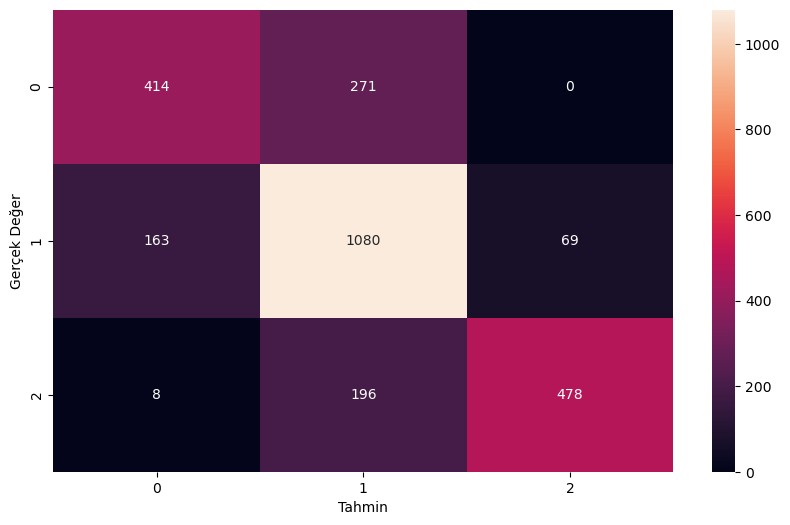

In [21]:
# Matplotlib kütüphanesini kullanarak bir 10x6 büyüklüğünde bir ısı haritası (heatmap) figürü oluşturuyoruz.
plt.figure(figsize=(10, 6))

# Seaborn kütüphanesini kullanarak bir ısı haritası oluşturuyoruz. 'cm' matrisini kullanıyoruz ve sayısal değerleri ekrana yazdırıyoruz.
sn.heatmap(cm, annot=True, fmt="d")

# x ekseni etiketi "tahmin" olarak ayarlanıyor.
plt.xlabel('Tahmin')

# y ekseni etiketi "gerçek değer" olarak ayarlanıyor.
plt.ylabel('Gerçek Değer')

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))
#Precision (Hassasiyet):Modelin pozitif olarak tahmin ettiği örneklerin ne kadarının gerçekten pozitif olduğunu gösterir.
#Recall (Duyarlılık):Gerçek pozitif örneklerin model tarafından ne kadarının doğru bir şekilde tespit edildiğini gösterir.
#F1-score:Hassasiyet ve duyarlılığın harmonik ortalamasını ifade eder.
#Support:Her bir sınıf için gerçek etiketlenmiş örnek sayısını temsil eder. 

#Accuracy (Doğruluk):Modelin doğru tahmin ettiği toplam örnek sayısının, tüm örnek sayısına oranını gösterir.
#Macro Avg (Makro Ortalama):Farklı sınıflar arasındaki metriklerin makro ortalamasını ifade eder. Her sınıfa eşit ağırlık verilir.
#Weighted Avg (Ağırlıklı Ortalama):Farklı sınıflar arasındaki metriklerin ağırlıklı ortalamasını ifade eder. Sınıfın örnek sayısına göre ağırlıklandırılır

              precision    recall  f1-score   support

           0       0.71      0.60      0.65       685
           1       0.70      0.82      0.76      1312
           2       0.87      0.70      0.78       682

    accuracy                           0.74      2679
   macro avg       0.76      0.71      0.73      2679
weighted avg       0.75      0.74      0.73      2679



In [23]:
from sklearn.linear_model import LogisticRegression

logistic_model1 = LogisticRegression(solver='liblinear',multi_class='ovr',max_iter=10000)
logistic_model1.fit(X_train,y_train)

l_scores = cross_val_score(logistic_model1,X,y,cv=5)

print("Lojistik Regresyon Eğitim verisi doğruluk oranı:",logistic_model1.score(X_train,y_train))
print("Lojistik Regresyon KFold doğruluk oranı ortalaması:",np.average(l_scores))

Lojistik Regresyon Eğitim verisi doğruluk oranı: 0.7340862422997947
Lojistik Regresyon KFold doğruluk oranı ortalaması: 0.7339657519372454


In [24]:
logistic_model2 = LogisticRegression(solver='sag', multi_class='auto',max_iter=10000)
logistic_model2.fit(X_train,y_train)

#l_scores_train2 = cross_val_score(Logisitc_model2,X_train,y_train,cv=5)
l_scores_2 = cross_val_score(logistic_model2,X_test,y_test,cv=5)

print("Lojistik Regresyon Eğitim verisi doğruluk oranı:",logistic_model2.score(X_train,y_train))
print("Lojistik Regresyon KFold doğruluk oranı:",np.average(l_scores_2))

Lojistik Regresyon Eğitim verisi doğruluk oranı: 0.7400597349262646
Lojistik Regresyon KFold doğruluk oranı: 0.740945738596736


In [25]:
average_train_accuracy = np.mean([logistic_model1.score(X_train,y_train),logistic_model2.score(X_train,y_train)])
print("Ortalama Eğitim verisi doğruluk oranı:", average_train_accuracy)

average_test_accuracy = np.mean([np.average(l_scores),np.average(l_scores_2)])
print("Ortalama KFold doğruluk oranı:", average_test_accuracy)

Ortalama Eğitim verisi doğruluk oranı: 0.7370729886130296
Ortalama KFold doğruluk oranı: 0.7374557452669908


Text(95.72222222222221, 0.5, 'gerçek değer')

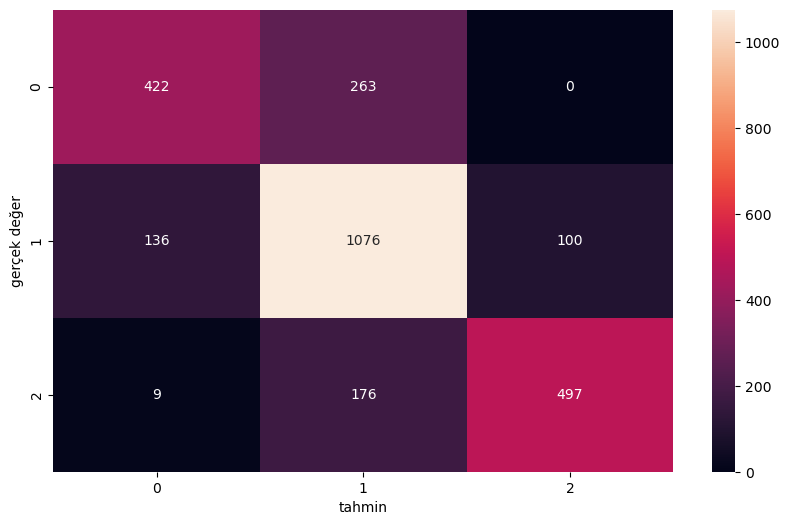

In [26]:
y_predicted = logistic_model2.predict(X_test)
cm =confusion_matrix(y_test, y_predicted)
cm
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel('tahmin')
plt.ylabel('gerçek değer')

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       685
           1       0.71      0.82      0.76      1312
           2       0.83      0.73      0.78       682

    accuracy                           0.74      2679
   macro avg       0.76      0.72      0.74      2679
weighted avg       0.75      0.74      0.74      2679



In [28]:
from sklearn.ensemble import RandomForestClassifier   # sınıflandırma için kütüphane ekleme

forest_model1 = RandomForestClassifier(n_estimators=120,max_depth=12,min_samples_split=4,min_samples_leaf=3)
forest_model1.fit(X_train,y_train)


f_scores_test = cross_val_score(forest_model1,X,y,cv=5)

print("Random Forest Eğitim verisi doğruluk oranı:",forest_model1.score(X_train,y_train))
print("Random Forest KFold doğruluk oranı:",np.average(f_scores_test))

Random Forest Eğitim verisi doğruluk oranı: 0.9025574015307075
Random Forest KFold doğruluk oranı: 0.8101253045218515


In [29]:
forest_model2 = RandomForestClassifier(n_estimators=50,min_samples_split=2,max_depth=20)
forest_model2.fit(X_train,y_train)

f_scores_test2 = cross_val_score(forest_model2,X,y,cv=5)

print("Random Forest Eğitim verisi doğruluk oranı:",forest_model2.score(X_train,y_train))
print("Random Forest KFold doğruluk oranı:",np.average(f_scores_test2))

Random Forest Eğitim verisi doğruluk oranı: 0.9982266193765167
Random Forest KFold doğruluk oranı: 0.8171433780453231


In [30]:
average_train_accuracy = np.mean([forest_model1.score(X_train,y_train),forest_model2.score(X_train,y_train)])
print("Ortalama Eğitim verisi doğruluk oranı:", average_train_accuracy)

average_test_accuracy = np.mean([np.average(f_scores_test),np.average(f_scores_test2)])
print("Ortalama KFold doğruluk oranı:", average_test_accuracy)

Ortalama Eğitim verisi doğruluk oranı: 0.9503920104536121
Ortalama KFold doğruluk oranı: 0.8136343412835874


In [31]:
forest_model3 = RandomForestClassifier(n_estimators=40,max_depth=8)
forest_model3.fit(X_train,y_train)

f_scores_test3 = cross_val_score(forest_model2,X,y,cv=5)

print("Random Forest Eğitim verisi doğruluk oranı:",forest_model3.score(X_train,y_train))
print("Random Forest KFold doğruluk oranı:",np.average(f_scores_test3))

Random Forest Eğitim verisi doğruluk oranı: 0.8104349449318649
Random Forest KFold doğruluk oranı: 0.8176665743936533


Text(95.72222222222221, 0.5, 'gerçek değer')

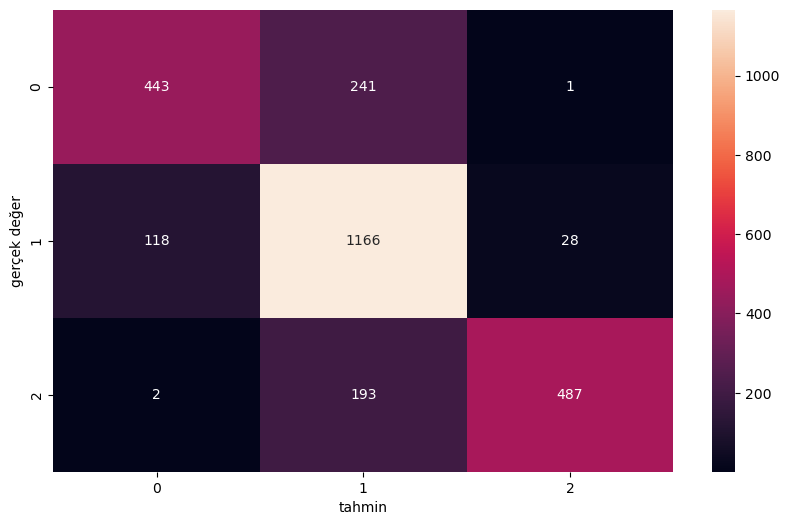

In [32]:
y_predicted = forest_model3.predict(X_test)
cm =confusion_matrix(y_test, y_predicted)
cm
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel('tahmin')
plt.ylabel('gerçek değer')

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71       685
           1       0.73      0.89      0.80      1312
           2       0.94      0.71      0.81       682

    accuracy                           0.78      2679
   macro avg       0.82      0.75      0.77      2679
weighted avg       0.80      0.78      0.78      2679

